# AMEO EDA

The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.

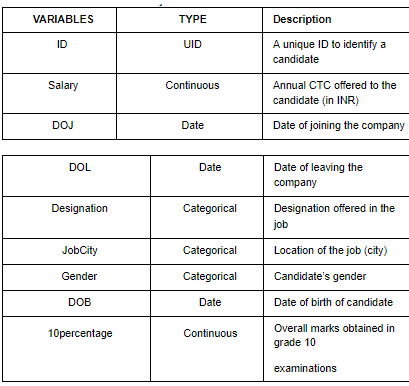

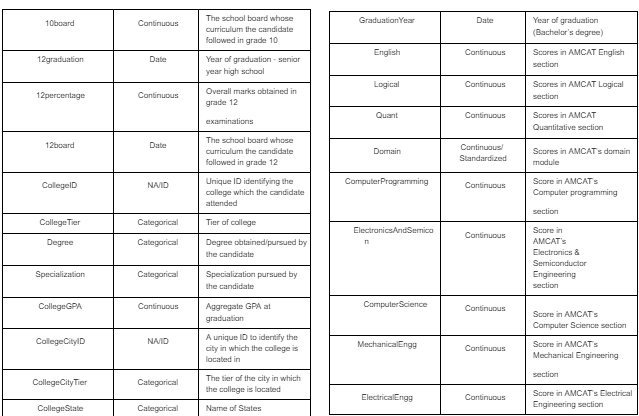

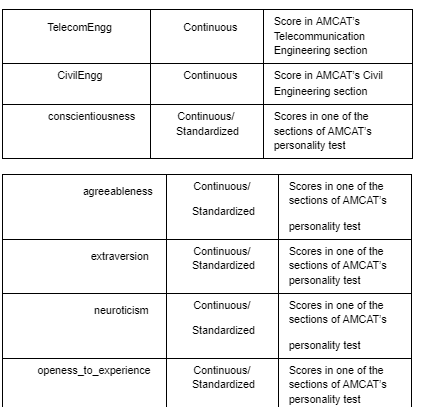

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data=pd.read_excel("/content/drive/Shareddrives/mayur/innomatics/EDA/aspiring_minds_employability_outcomes_2015.xlsx")
data.shape

(3998, 39)

In [ ]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,Specialization,collegeGPA,CollegeCityID,CollegeCityTier,CollegeState,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,95.8,"board of intermediate education,ap",1141,2,B.Tech/B.E.,computer engineering,78.00,1141,0,Andhra Pradesh,2011,515,585,525,0.635979,445,-1,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,electronics and communication engineering,70.06,5807,0,Madhya Pradesh,2012,695,610,780,0.960603,-1,466,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,information technology,70.00,64,0,Uttar Pradesh,2014,615,545,370,0.450877,395,-1,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,computer engineering,74.64,6920,1,Delhi,2011,635,585,625,0.974396,615,-1,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,electronics and communication engineering,73.90,11368,0,Uttar Pradesh,2012,545,625,465,0.124502,-1,233,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
data.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,2012.105803,501.649075,501.598799,513.378189,0.510490,353.102801,95.328414,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,31.857271,104.940021,86.783297,122.302332,0.468671,205.355519,158.241218,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,0.000000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,2012.000000,425.000000,445.000000,430.000000,0.342315,295.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,2013.000000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,2014.000000,570.000000,565.000000,595.000000,0.842248,495.000000,233.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,2017.000000,875.000000,795.000000,900.000000,0.999910,840.000000,612.000000,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [ ]:
#Find data type
data_dtype=data.dtypes
print(data_dtype)

Unnamed: 0                       object
ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64


In [ ]:
data.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

#### Univariate Analysis

In [ ]:
#take continous variable 
data_num=data.select_dtypes(include=["int","float"])
data_num=data_num.drop(['ID','12graduation','CollegeID','CollegeTier','CollegeCityID','CollegeCityTier','GraduationYear'],axis=1)
data_num.shape

(3998, 20)

In [ ]:
print(data_num.columns)

Index(['Salary', '10percentage', '12percentage', 'collegeGPA', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')


##### Find the outliers
Detecting outlier using Z score

In [ ]:
def detect_outliers(data):
    outliers=[]
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

#### Continous variable analysis

###### Salary

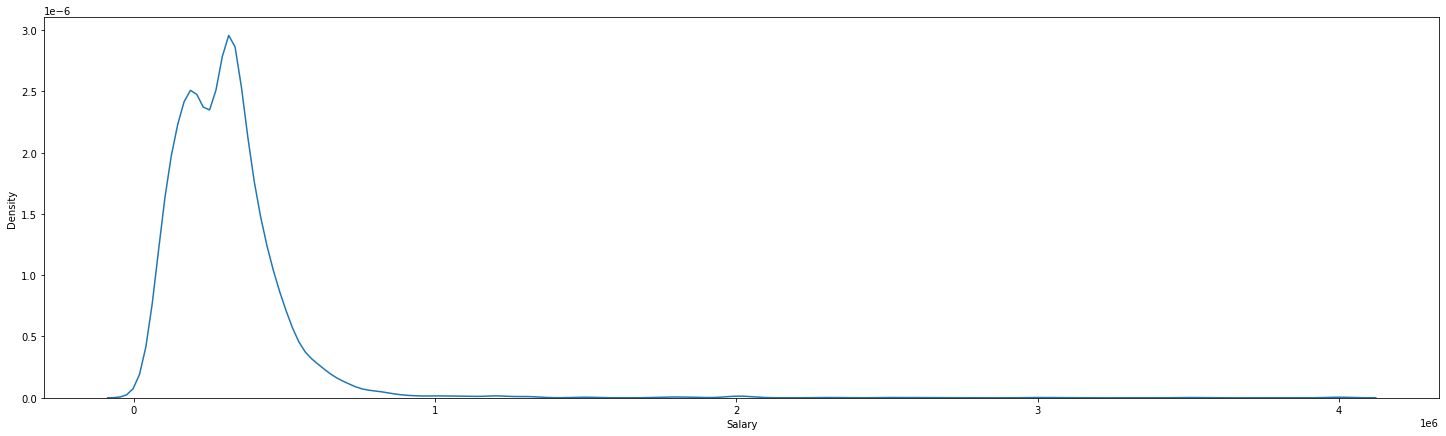

In [ ]:
#kde
plt.figure(figsize=(25,7))
sns.kdeplot(data_num["Salary"])

* **Above boxplot shows salary has right skewed distribution.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


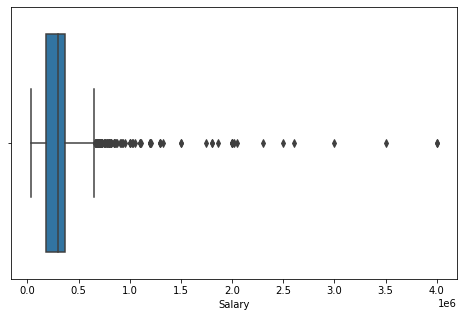

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('Salary',data=data_num)

* **Above boxplot shows salary has right skewed distribution.**
* Very few stdents get salary above 6Lac.

* Find the outliers

In [ ]:
outlier_Salary=detect_outliers(data_num['Salary'])
print("outliers of Salary: ",outlier_Salary)
print("Number of student get salry above 10 Lac: ",len(outlier_Salary))


outliers of Salary:  [1100000, 1500000, 1200000, 1860000, 1110000, 1200000, 1000000, 2600000, 1025000, 1300000, 3500000, 1300000, 1050000, 2000000, 4000000, 2020000, 2050000, 1320000, 3000000, 2500000, 2300000, 950000, 1300000, 1200000, 4000000, 1800000, 1200000, 1000000, 1000000, 1745000, 2000000, 1800000, 1200000, 1030000, 1210000, 1500000, 1100000, 2000000, 2000000, 1100000]
Number of student get salry above 10 Lac:  40


* there are only 40 student get salary above 10 Lac.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


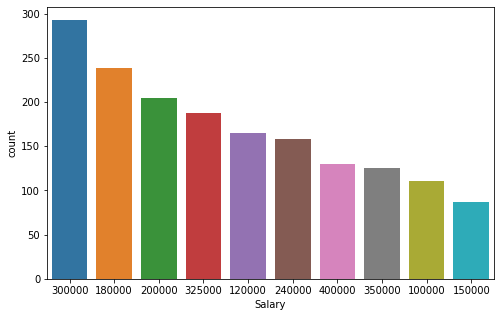

In [ ]:
#countlpot
plt.figure(figsize=(8,5))
sns.countplot(data_num['Salary'],order=data_num['Salary'].value_counts().iloc[:10].index)

* More than 250 students has 300000 salary.
* Second highest salary is 180000.
* Lowest salary is 150000.

###### 10percentage

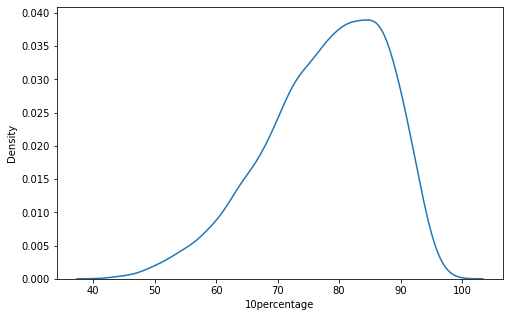

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['10percentage'])

* Around 40% students has around 85% in 10th standard.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


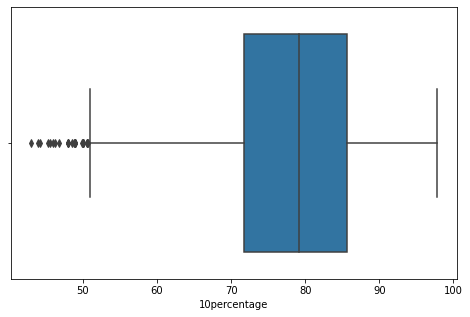

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('10percentage',data=data_num)

* Above distribution is left skewed distribution.
* few student get percentage less than 50%.
* On an avarage student get 80%.

In [ ]:
outlier_10thper=detect_outliers(data_num['10percentage'])
print("outliers 10percentage less than 50%: ",outlier_10thper)
print("Number of student get 10th percentage below 50: ",len(outlier_10thper))

outliers 10percentage less than 50%:  [44.16, 44.0, 45.6, 48.0, 48.0, 48.0, 43.0, 45.33, 46.24, 48.0, 46.8, 46.0]
Number of student get 10th percentage below 50:  12


###### 12percentage

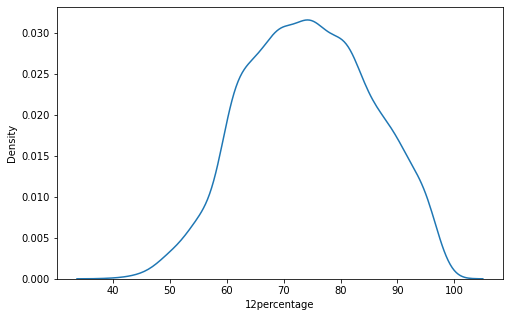

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['12percentage'])

* More than Thirty percentage student get around 75% in 12th.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


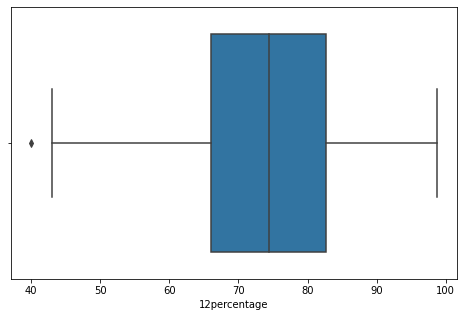

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('12percentage',data=data_num)

* Above data is Normally distributed
* 50th percentile is around 75

In [ ]:
outlier_12perc=detect_outliers(data_num['12percentage'])
print("outliers of 12percentage: ",outlier_12perc)
print("Number of student get percentage below 50: ",len(outlier_12perc))

outliers of 12percentage:  [40.0]
Number of student get percentage below 50:  1


###### English

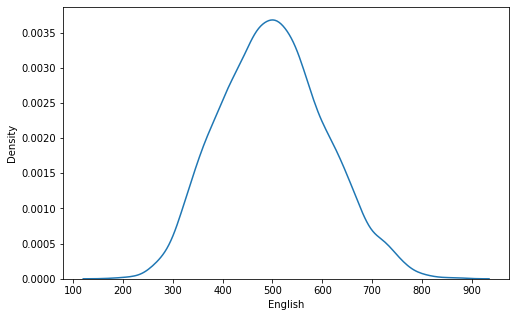

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['English'])

* It is normally distributed data
* Average of English marks is 500

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


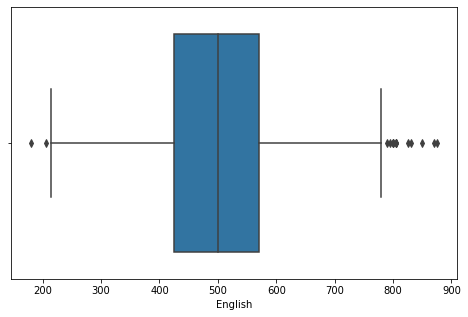

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('English',data=data_num)

* It is normally distributed data
* Outliers present at both tail
* Marks below 200 and marks above 800 are ouliers

In [ ]:
outlier_English=detect_outliers(data_num['English'])
print("outliers of English: ",outlier_English)
print("Number of student get English marks above800 and below 200: ",len(outlier_English))

outliers of English:  [875, 825, 870, 180, 830, 850]
Number of student get English marks above800 and below 200:  6


###### Logical

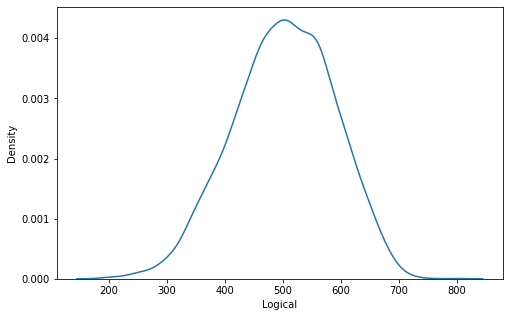

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['Logical'])

* Average student get 500 marks in Logical

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


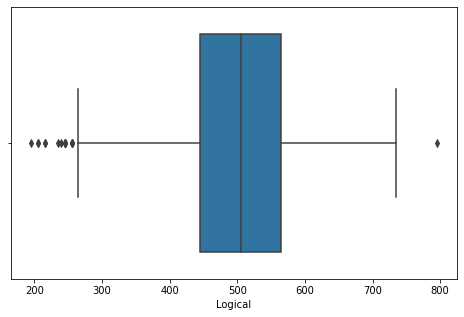

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('Logical',data=data_num)

* Outliers are present at both tail
* Marks below 300 and above 720 are outliers

In [ ]:
outlier_Logical=detect_outliers(data_num['Logical'])
print("outliers of Logical: ",outlier_Logical)
print("Number of student get Logical marks above720 and below 300: ",len(outlier_Logical))

outliers of Logical:  [205, 215, 215, 795, 240, 195, 205, 235]
Number of student get Logical marks above720 and below 300:  8


###### Quant

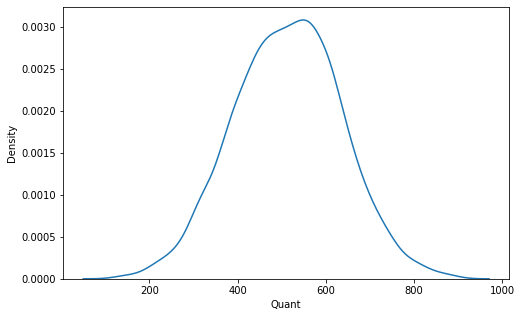

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['Quant'])

* It is a normal distribution
* On an Average student get around 500 marks in Quant.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


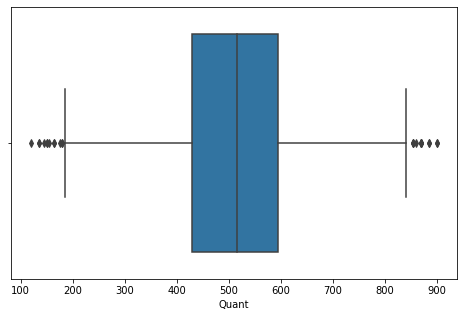

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('Quant',data=data_num)

* Outliers are present at both tail
* Marks below 200 and above 850 are outliers

In [ ]:
outlier_Quant=detect_outliers(data_num['Quant'])
print("outliers of Quant: ",outlier_Quant)
print("Number of student get Quant marks below 200 and above 850 : ",len(outlier_Quant))

outliers of Quant:  [135, 145, 885, 120, 900, 135, 900, 885]
Number of student get Quant marks below 200 and above 850 :  8


* Only 4 student has above 800 marks

 ###### Domain

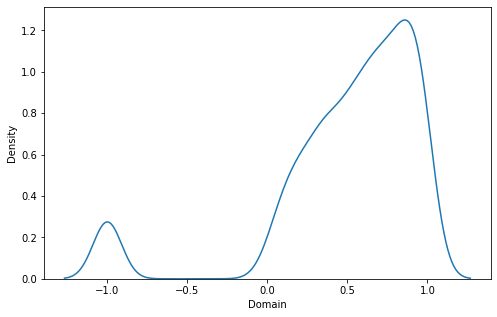

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['Domain'])

* It has bimodal data
* some student get marks in negative

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


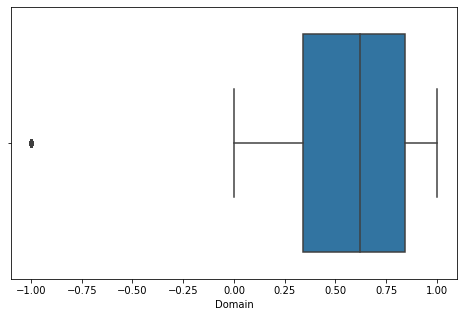

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('Domain',data=data_num)

*  few student get marks in negative.
* -1 are outliers

In [ ]:
outlier_Domain=detect_outliers(data_num['Domain'])
print("outliers of Domain: ",outlier_Domain)
print("Number of student get Quant marks below 0  : ",len(outlier_Domain))

outliers of Domain:  [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 

[0.06153077 0.         0.         0.         0.         0.0847924
 0.16458229 0.15107554 0.24387194 0.29414707]
[-1.00000000e+00 -8.00008959e-01 -6.00017918e-01 -4.00026878e-01
 -2.00035837e-01 -4.47961843e-05  1.99946245e-01  3.99937285e-01
  5.99928326e-01  7.99919367e-01  9.99910408e-01]


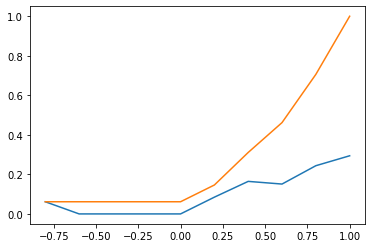

In [ ]:
counts, bin_edges = np.histogram(data_num['Domain'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

* 60% student get scores below 0.60

 ###### ComputerProgramming

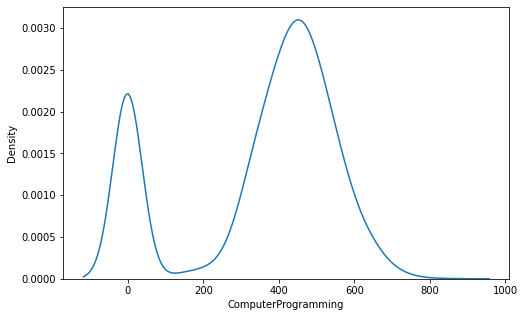

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['ComputerProgramming'])

* It is bimodal data
* Student below 200 marks has remarkable frequency



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


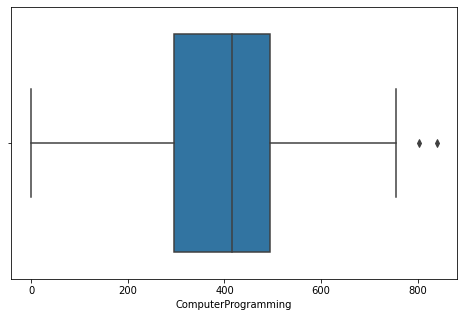

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('ComputerProgramming',data=data_num)

* Ouliers are present above 800
*50% student get marks between 250 to 500

In [ ]:
outlier_ComputerProgramming=detect_outliers(data_num['ComputerProgramming'])
print("outliers of ComputerProgramming: ",outlier_ComputerProgramming)
print("Number of student get ComputerProgramming marks above 800  : ",len(outlier_ComputerProgramming))

outliers of ComputerProgramming:  []
Number of student get ComputerProgramming marks above 800  :  0


* Outliers are not present in data

 ###### ElectronicsAndSemicon

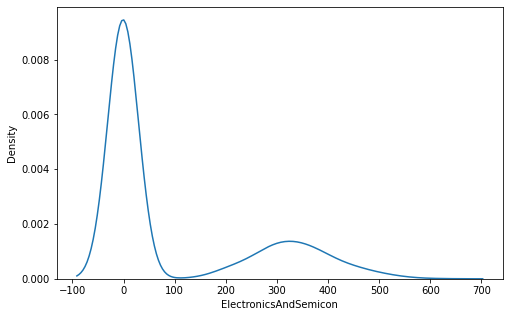

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['ElectronicsAndSemicon'])

* It is bimodal data
* marks above 100 has low frequency than marks beloww 100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


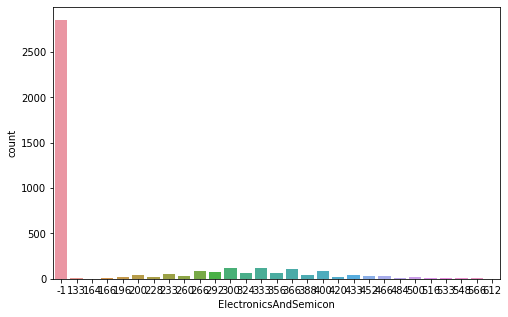

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data_num['ElectronicsAndSemicon'])

* More than 50% Student get negative marks.
* Postive marks count is low. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


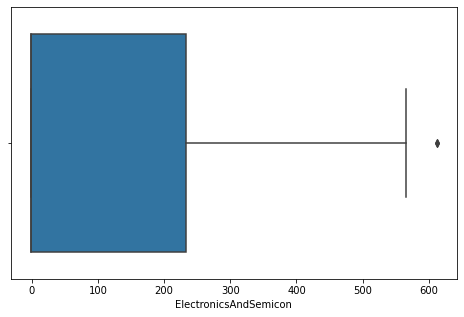

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('ElectronicsAndSemicon',data=data_num)

* It is positive skewed data
*More than 50% Student get marks between 0 to 250. 

In [ ]:
outlier_ElectronicsAndSemicon=detect_outliers(data_num['ElectronicsAndSemicon'])
print("outliers of ElectronicsAndSemicon: ",outlier_ElectronicsAndSemicon)
print("Number of student get ElectronicsAndSemicon marks above 800  : ",len(outlier_ElectronicsAndSemicon))

outliers of ElectronicsAndSemicon:  [612, 612]
Number of student get ElectronicsAndSemicon marks above 800  :  2


* Only two student has marks above 500
* Above data shows that,ElectronicsAndSemicon has tough Paper.

 ###### ComputerScience

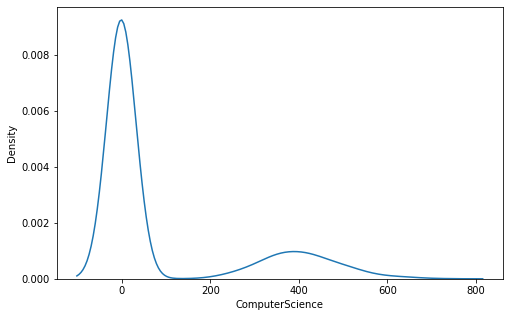

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['ComputerScience'])

* More than 80% student has marks 0.
* Very few student has marks above 200.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


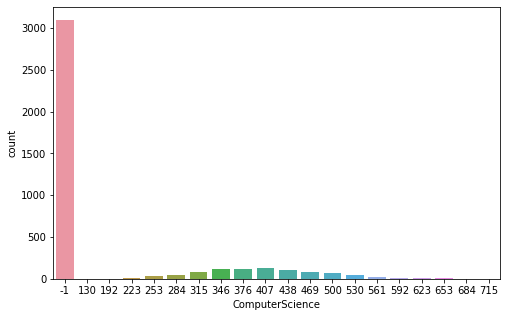

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data_num['ComputerScience'])

* more than 3000 student has zero marks.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


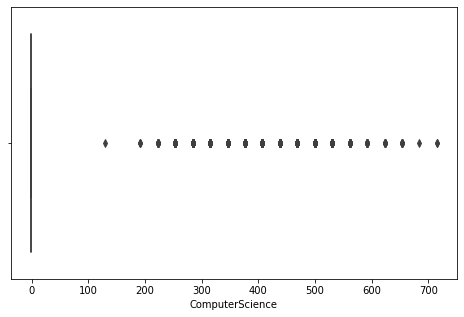

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('ComputerScience',data=data_num)

* It is right skewed distribution.

In [ ]:
outlier_ComputerScience=detect_outliers(data_num['ComputerScience'])
print("outliers of ComputerScience: ",outlier_ComputerScience)
print("Number of student get ComputerScience marks above 600 : ",len(outlier_ComputerScience))

outliers of ComputerScience:  [684, 623, 653, 653, 623, 623, 653, 623, 653, 653, 653, 623, 653, 623, 623, 623, 715, 623, 653, 623, 715, 653]
Number of student get ComputerScience marks above 600 :  22


 ###### MechanicalEngg

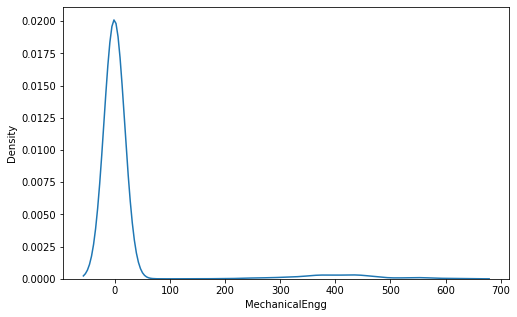

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['MechanicalEngg'])

* Very few student get positive marks

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


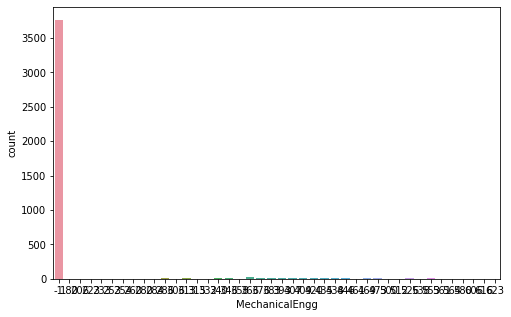

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data_num['MechanicalEngg'])

* More than 3500 student get fail in MechanicalEngg.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


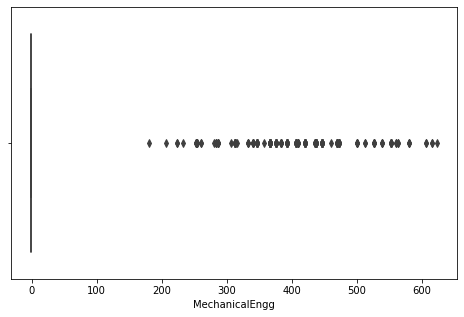

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('MechanicalEngg',data=data_num)

* Very few student passed the exam.

In [ ]:
outlier_MechanicalEngg=detect_outliers(data_num['MechanicalEngg'])
print("outliers of MechanicalEngg: ",outlier_MechanicalEngg)
print("Number of student get ComputerScience marks above 200 : ",len(outlier_MechanicalEngg))

outliers of MechanicalEngg:  [469, 366, 446, 438, 446, 332, 393, 366, 383, 393, 438, 561, 553, 446, 376, 526, 376, 553, 469, 409, 366, 409, 366, 473, 340, 420, 383, 538, 346, 393, 393, 553, 438, 538, 435, 438, 512, 407, 469, 580, 366, 393, 366, 366, 393, 435, 340, 473, 438, 469, 358, 512, 366, 500, 473, 407, 446, 446, 366, 420, 580, 393, 340, 420, 473, 383, 332, 340, 473, 553, 469, 446, 376, 376, 366, 332, 553, 438, 553, 438, 616, 564, 407, 438, 420, 383, 446, 435, 538, 438, 420, 409, 616, 346, 407, 366, 407, 346, 393, 346, 393, 553, 473, 473, 553, 393, 564, 420, 500, 461, 346, 420, 393, 376, 393, 366, 420, 473, 435, 526, 500, 420, 376, 366, 383, 340, 446, 438, 346, 376, 346, 407, 407, 407, 366, 438, 366, 446, 446, 376, 376, 438, 435, 500, 606, 376, 407, 420, 606, 446, 420, 376, 526, 409, 346, 446, 469, 446, 420, 526, 446, 469, 580, 407, 446, 376, 438, 366, 346, 366, 409, 469, 526, 435, 407, 366, 561, 446, 435, 420, 438, 346, 438, 469, 366, 376, 469, 346, 473, 623, 366, 340, 420, 393, 

* Out of 4000 only 197 student passed the exam
* It is toughest exam.

###### ElectricalEngg

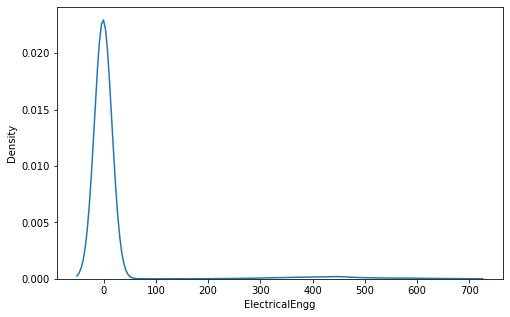

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['ElectricalEngg'])

* Very few student get positive marks

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


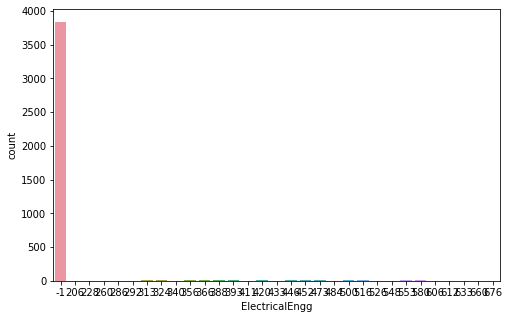

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data_num['ElectricalEngg'])

* More than 3500 student get fail in ElectricalEngg.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


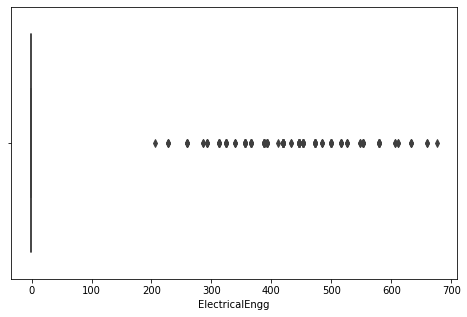

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('ElectricalEngg',data=data_num)

* Very few student able to passed the exam.

In [ ]:
outlier_ElectricalEngg=detect_outliers(data_num['ElectricalEngg'])
print("outliers of ElectricalEngg: ",outlier_ElectricalEngg)
print("Number of student get ElectricalEngg marks above 200 : ",len(outlier_ElectricalEngg))

outliers of ElectricalEngg:  [484, 606, 393, 500, 553, 580, 446, 446, 446, 446, 420, 324, 393, 388, 356, 313, 633, 388, 516, 356, 366, 420, 612, 580, 388, 452, 452, 324, 446, 388, 553, 500, 526, 420, 324, 446, 452, 452, 548, 516, 388, 516, 500, 393, 324, 433, 553, 526, 633, 473, 473, 388, 420, 420, 420, 580, 553, 356, 526, 676, 292, 660, 446, 452, 433, 411, 393, 612, 388, 473, 286, 420, 484, 446, 420, 420, 452, 324, 446, 340, 313, 446, 388, 473, 356, 324, 580, 366, 366, 446, 286, 366, 313, 452, 292, 473, 388, 393, 366, 340, 356, 356, 324, 500, 356, 500, 452, 388, 516, 473, 452, 292, 420, 580, 420, 313, 548, 446, 313, 553, 340, 473, 633, 484, 356, 313, 500, 420, 500, 366, 420, 580, 580, 516, 446, 292, 500, 420, 473, 393, 553, 473, 446, 420, 393, 420, 452, 473, 660, 356, 366, 606, 580]
Number of student get ElectricalEngg marks above 200 :  153


* Out of 4000 only 153 student passed the exam
* It is toughest exam.

###### TelecomEngg

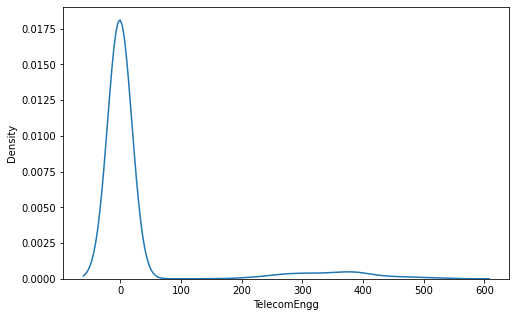

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['TelecomEngg'])

* Very few student get positive marks

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


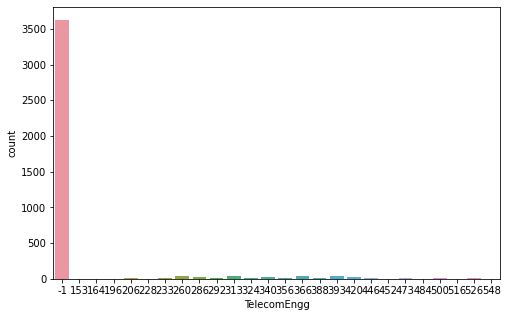

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data_num['TelecomEngg'])

* More than 3500 student get fail in TelecomEngg.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


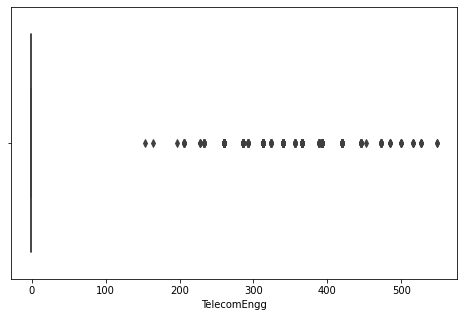

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('TelecomEngg',data=data_num)

* Very few student able to passed the exam.

In [ ]:
outlier_TelecomEngg=detect_outliers(data_num['TelecomEngg'])
print("outliers of TelecomEngg: ",outlier_TelecomEngg)
print("Number of student get TelecomEngg marks above 200 : ",len(outlier_TelecomEngg))

outliers of TelecomEngg:  [420, 393, 393, 366, 446, 446, 446, 366, 366, 393, 473, 393, 484, 420, 484, 366, 366, 452, 393, 366, 366, 393, 526, 484, 526, 516, 420, 366, 356, 420, 420, 393, 393, 548, 366, 420, 366, 446, 446, 420, 393, 393, 420, 393, 393, 548, 473, 473, 366, 446, 366, 366, 393, 366, 393, 393, 356, 393, 366, 420, 366, 473, 356, 393, 388, 516, 366, 366, 420, 500, 484, 473, 446, 473, 366, 446, 473, 366, 393, 366, 473, 366, 420, 420, 393, 366, 356, 473, 366, 356, 366, 393, 393, 388, 366, 473, 420, 393, 388, 446, 420, 393, 388, 420, 366, 446, 356, 446, 393, 366, 393, 366, 388, 420, 356, 420, 388, 516, 388, 393, 393, 366, 366, 356, 500, 420, 420, 393, 393, 388, 393, 366, 473, 393, 388, 420, 366, 446, 366, 516, 388, 526, 366, 420, 366, 473, 366, 356, 356, 393, 393, 420, 420, 420, 393, 526, 393, 446, 388, 388, 366, 388, 393, 393, 393, 500, 446, 366, 356, 356, 446, 473, 420, 393, 393, 393, 393, 388, 420, 526, 366, 446, 393, 500, 366, 500, 366, 366, 393, 393]
Number of student get T

* Out of 4000 only 190 student passed the exam
* It is toughest exam.

###### CivilEngg

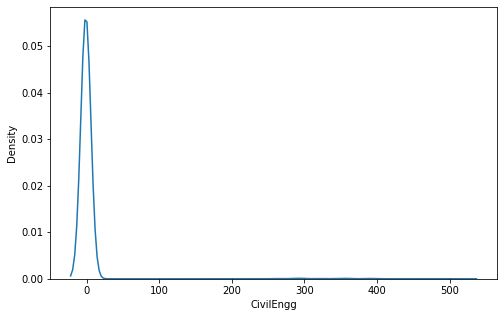

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['CivilEngg'])

* Average marks zero.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


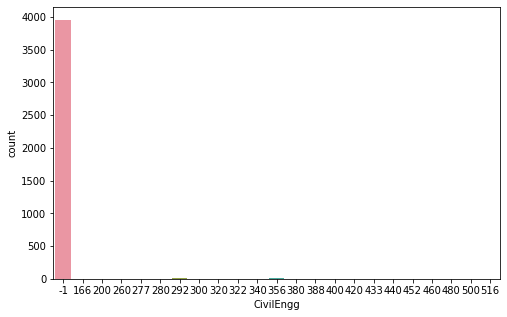

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data_num['CivilEngg'])

* More than 3500 student get marks below zero in CivilEngg.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


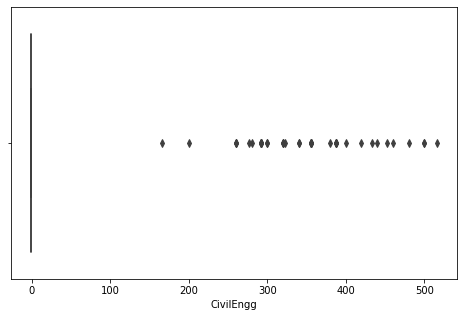

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('CivilEngg',data=data_num)

* Very few student able to get positive marks.

In [ ]:
outlier_CivilEngg=detect_outliers(data_num['CivilEngg'])
print("outliers of CivilEngg: ",outlier_CivilEngg)
print("Number of student get CivilEngg marks above 200 : ",len(outlier_CivilEngg))

outliers of CivilEngg:  [320, 400, 388, 320, 260, 440, 356, 356, 292, 500, 200, 300, 388, 500, 452, 322, 340, 260, 260, 166, 388, 277, 356, 356, 516, 380, 292, 320, 356, 433, 292, 300, 356, 292, 280, 340, 420, 292, 388, 292, 460, 480]
Number of student get CivilEngg marks above 200 :  42


* Out of 4000 only 42 student passed the exam
* It is toughest exam.

###### conscientiousness

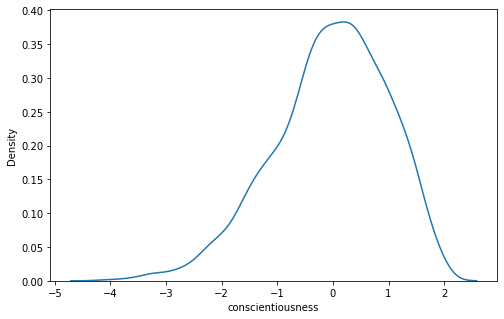

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['conscientiousness'])

* Mean is at around  zero

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


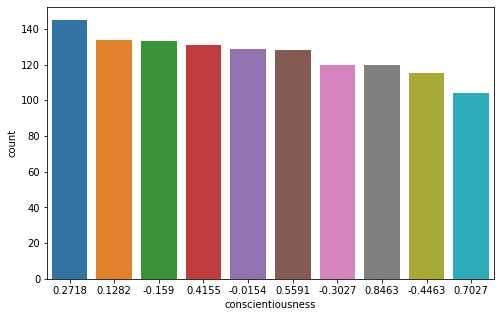

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data_num['conscientiousness'],order=data_num['conscientiousness'].value_counts().iloc[:10].index)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


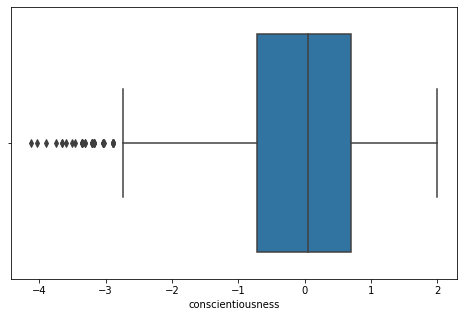

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('conscientiousness',data=data_num)

* 50th percentile at zero


In [ ]:
outlier_conscientiousness=detect_outliers(data_num['conscientiousness'])
print("outliers of conscientiousness: ",outlier_conscientiousness)
print("Number of student get conscientiousness below -3 : ",len(outlier_conscientiousness))

outliers of conscientiousness:  [-3.1994, -3.1994, -3.6631, -3.606, -3.3539, -3.3539, -3.3188, -3.1752, -3.4624, -3.1752, -3.3539, -3.6631, -3.1994, -3.1994, -4.1267, -3.3539, -3.3539, -3.1752, -3.8933, -3.1752, -3.5085, -3.7496, -4.0369, -3.1752, -3.3188, -3.1994]
Number of student get conscientiousness below -3 :  26


[0.00175088 0.00575288 0.0150075  0.04427214 0.09229615 0.13506753
 0.25237619 0.21685843 0.16058029 0.07603802]
[-4.1267 -3.5145 -2.9023 -2.2901 -1.6779 -1.0657 -0.4535  0.1587  0.7709
  1.3831  1.9953]


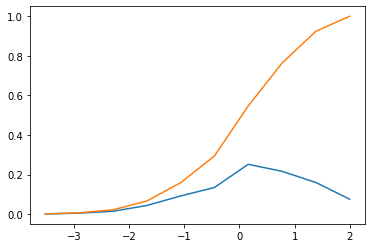

In [ ]:
counts, bin_edges = np.histogram(data_num['conscientiousness'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

* 80% student scores below 1

###### agreeableness

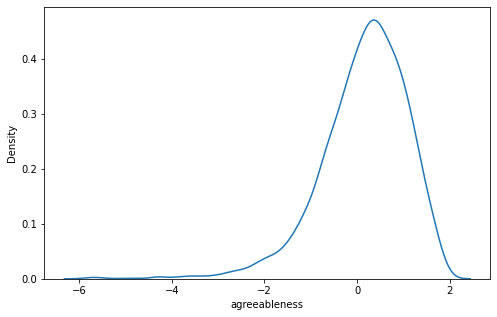

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['agreeableness'])

* Mean is at around  zero

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


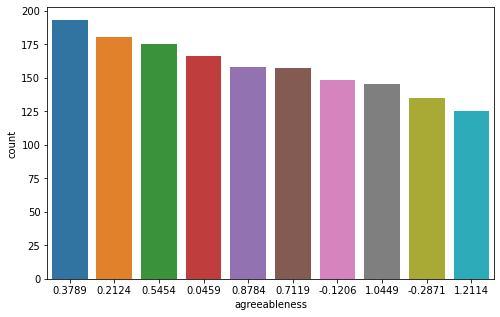

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data_num['agreeableness'],order=data_num['agreeableness'].value_counts().iloc[:10].index)

* More than 175 student get 0.3789 score.
* Around 175 student get 0.2124 score
* Around 125 student score 1.2114

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


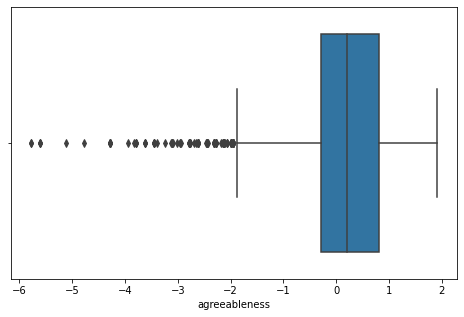

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('agreeableness',data=data_num)

* agreeableness data is left skewed data
* Outliers find Below -2 

In [ ]:
outlier_agreeableness=detect_outliers(data_num['agreeableness'])
print("outliers of agreeableness: ",outlier_agreeableness)
print("Number of student get agreeableness below -2 : ",len(outlier_agreeableness))

outliers of agreeableness:  [-2.6847, -3.7836, -4.2831, -2.9314, -5.6151, -5.1156, -3.6171, -2.7754, -3.4506, -3.0874, -5.7816, -4.2831, -4.2831, -3.1176, -3.7836, -3.1176, -3.1264, -3.0094, -3.6171, -3.6171, -3.4506, -3.4506, -2.7754, -3.9501, -2.9511, -4.2831, -4.7826, -3.8284, -2.7846, -2.7754, -2.7846, -2.7754, -3.2434, -2.9511, -5.6151, -2.7754, -3.1176, -3.4506, -4.2831, -5.6151, -3.7836, -4.2831, -3.3994, -2.7846, -5.7816]
Number of student get agreeableness below -2 :  45


[0.00150075 0.00175088 0.002001   0.00575288 0.01975988 0.04677339
 0.16708354 0.29589795 0.33941971 0.12006003]
[-5.7816  -5.01296 -4.24432 -3.47568 -2.70704 -1.9384  -1.16976 -0.40112
  0.36752  1.13616  1.9048 ]


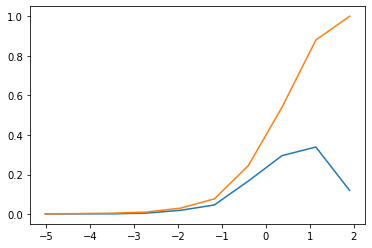

In [ ]:
counts, bin_edges = np.histogram(data_num['agreeableness'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

* 60% student score below 0.5

###### extraversion

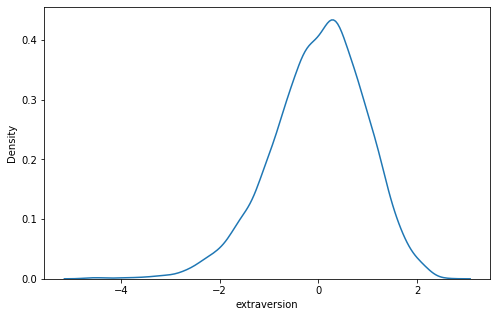

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['extraversion'])

* mean at zero
* Follows stanadard noraml distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


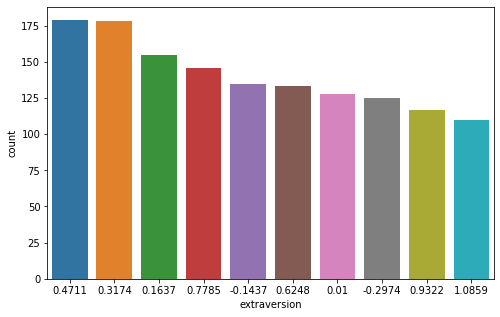

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data_num['extraversion'],order=data_num['extraversion'].value_counts().iloc[:10].index)

* 175 student score 0.4711.
* 175 student score 0.3174.
* 100 student score 1.0859.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


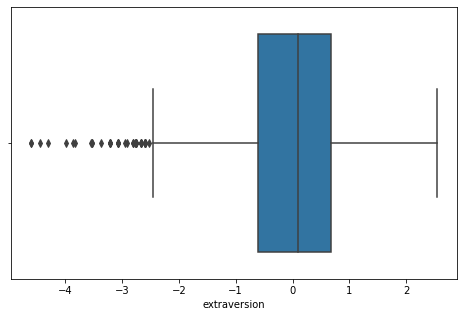

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('extraversion',data=data_num)

* 50th percentile at zero
* Outliers lie below -2


In [ ]:
outlier_extraversion=detect_outliers(data_num['extraversion'])
print("outliers of extraversion: ",outlier_extraversion)
print("Number of student get extraversion below -2 : ",len(outlier_extraversion))

outliers of extraversion:  [-3.2176, -4.6009, -3.525, -3.0639, -3.2176, -4.6009, -2.9565, -4.2935, -3.0639, -3.537, -3.525, -3.8636, -3.0639, -2.9102, -3.2176, -3.2176, -3.3713, -3.9861, -3.0639, -3.8324, -4.4472]
Number of student get extraversion below -2 :  21


[0.00125063 0.00250125 0.00625313 0.03301651 0.10155078 0.19184592
 0.3124062  0.25012506 0.08504252 0.016008  ]
[-4.6009  -3.88727 -3.17364 -2.46001 -1.74638 -1.03275 -0.31912  0.39451
  1.10814  1.82177  2.5354 ]


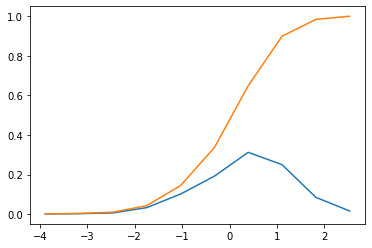

In [ ]:
counts, bin_edges = np.histogram(data_num['extraversion'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

* 80% student get marks below 1

###### neuroticism

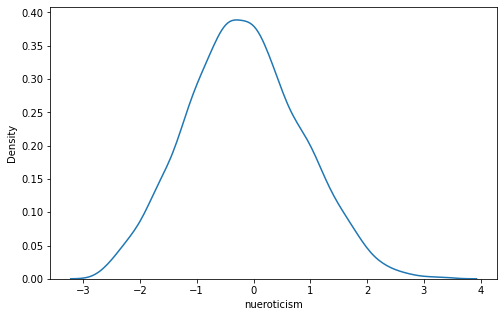

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['nueroticism'])

* Mean at 0.5
* Follows stanadard noraml distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


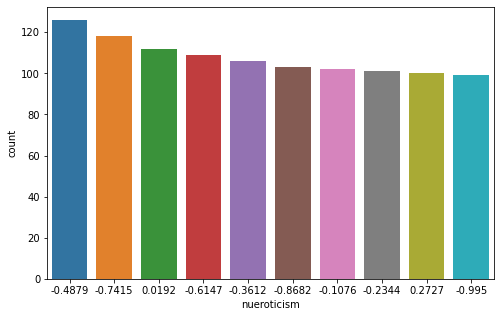

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data_num['nueroticism'],order=data_num['nueroticism'].value_counts().iloc[:10].index)

* Around 120 student score -0.4879
* more than 100 student score -0.7417
* 100 student -0.995

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


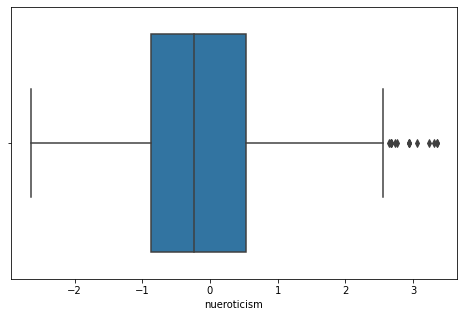

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('nueroticism',data=data_num)

* mean at 0.5
* Outliers presetn above 2.5

In [ ]:
outlier_nueroticism=detect_outliers(data_num['nueroticism'])
print("outliers of 'nueroticism': ",outlier_nueroticism)
print("Number of student get 'nueroticism' above 2.5 : ",len(outlier_nueroticism))

outliers of 'nueroticism':  [2.9349, 3.3525, 3.3525, 3.235, 3.0617, 2.9349, 3.3152, 2.9349]
Number of student get 'nueroticism' above 2.5 :  8


[0.02701351 0.07928964 0.16183092 0.2086043  0.22486243 0.15782891
 0.0927964  0.03501751 0.01050525 0.00225113]
[-2.643   -2.04345 -1.4439  -0.84435 -0.2448   0.35475  0.9543   1.55385
  2.1534   2.75295  3.3525 ]


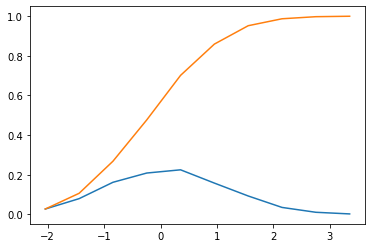

In [ ]:
counts, bin_edges = np.histogram(data_num['nueroticism'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

* 80% student has marks below 1

###### openess_to_experience

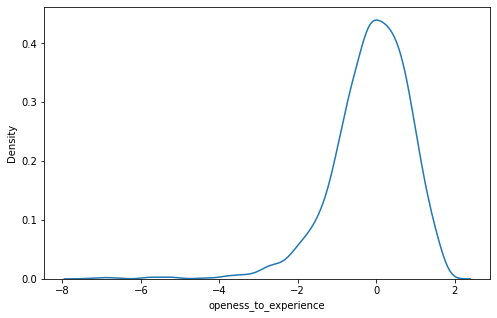

In [ ]:
#kde
plt.figure(figsize=(8,5))
sns.kdeplot(data_num['openess_to_experience'])

* Mean at zero
* Follows stanadard noraml distribution

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


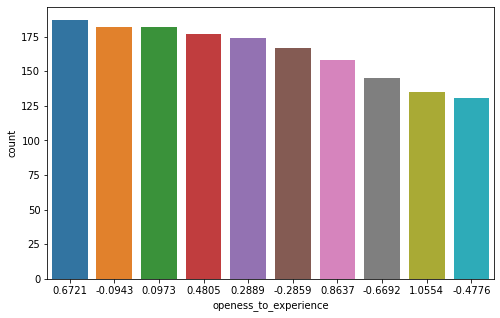

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data_num['openess_to_experience'],order=data_num['openess_to_experience'].value_counts().iloc[:10].index)

* more than 175 student score 0.6721
* more than  100 student score -0.4776

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


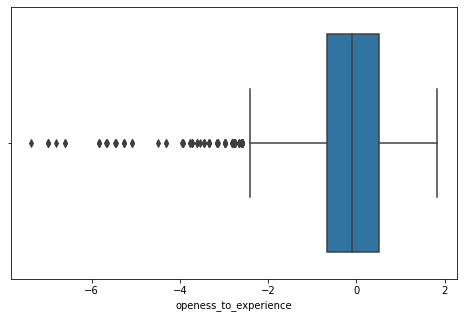

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('openess_to_experience',data=data_num)

* ou;iers lies below -2

In [ ]:
outlier_openess_to_experience=detect_outliers(data_num['openess_to_experience'])
print("outliers of 'openess_to_experience': ",outlier_openess_to_experience)
print("Number of student get openess_to_experience below -2 : ",len(outlier_openess_to_experience))

outliers of 'openess_to_experience':  [-5.0763, -5.477, -5.2679, -3.9605, -4.5015, -6.9925, -3.4471, -5.2679, -3.3518, -3.735, -4.3099, -3.4471, -3.735, -6.9925, -3.3518, -5.8428, -3.5434, -3.3518, -6.8009, -3.9266, -3.6051, -3.763, -5.686, -4.3099, -3.4471, -5.6512, -5.4595, -3.3518, -5.8428, -3.763, -3.735, -5.8428, -3.3518, -6.6092, -3.9266, -5.2679, -5.0763, -7.3757, -6.6092, -6.9925, -3.6051]
Number of student get openess_to_experience below -2 :  41


[0.00175088 0.00125063 0.00175088 0.00275138 0.010005   0.03176588
 0.1098049  0.34742371 0.3841921  0.10930465]
[-7.3757  -6.45589 -5.53608 -4.61627 -3.69646 -2.77665 -1.85684 -0.93703
 -0.01722  0.90259  1.8224 ]


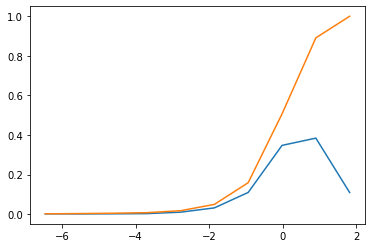

In [ ]:
counts, bin_edges = np.histogram(data_num['openess_to_experience'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

* 40% student has marks below 0

#### Categorical analysis

In [ ]:
#data_cat=data[["Designation,JobCity,Gender,CollegeTier,Degree,Specialization,CollegeCityTier,CollegeState"]]

###### Designation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


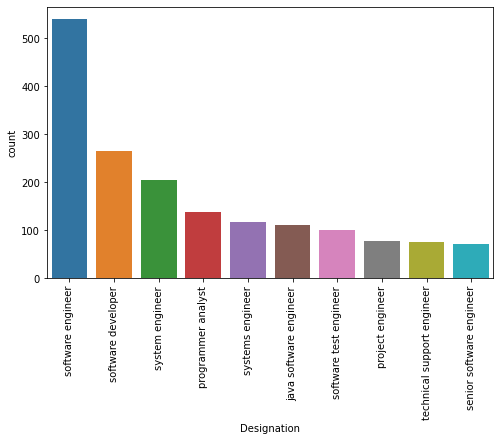

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data['Designation'],order=data['Designation'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

* Software engineer has more than 500 Designation.
*Software developer has more than 200 Designation.
* Senior software engineer has low count as compare to software engineer

###### JobCity

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


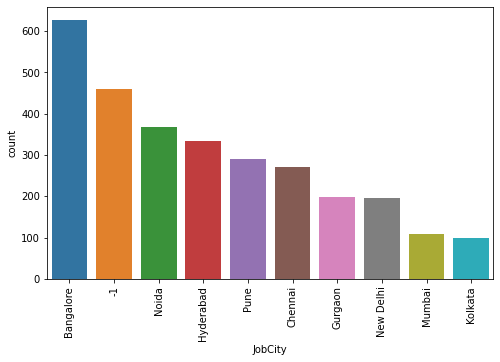

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data['JobCity'],order=data['JobCity'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

* More than 600 stuednts job city is banglore.
* Mumbai and kolkata has lower count.

###### Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


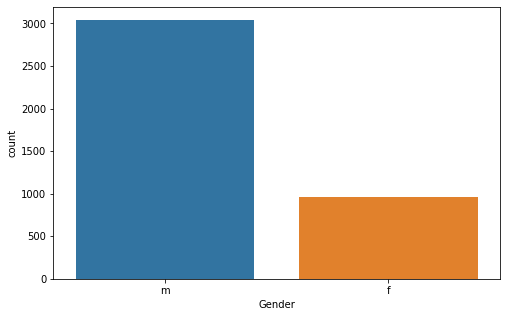

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data['Gender'],order=data['Gender'].value_counts().iloc[:10].index)

plt.show()

* Out of 4000 students male has 3000 count.
* Ratio of male:female is 3:4

###### CollegeTier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


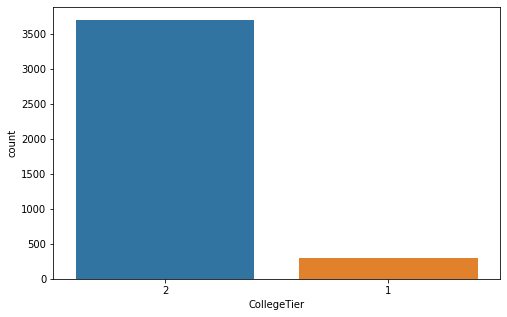

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data['CollegeTier'],order=data['CollegeTier'].value_counts().iloc[:10].index)
#plt.xticks(rotation=90)
plt.show()

* Out of 4000 college more than 3500 colleges from tier 2.

In [ ]:
data['CollegeTier'].value_counts()

2    3701
1     297
Name: CollegeTier, dtype: int64

* Only 297 colleges from tier 1.

###### Degree

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


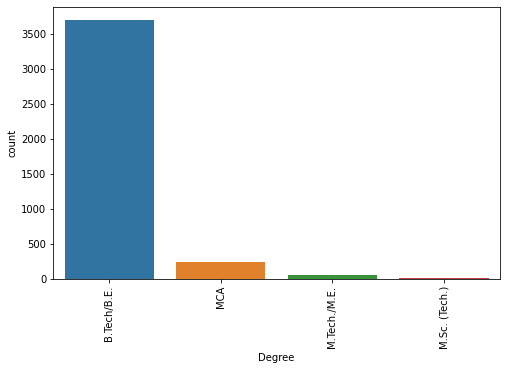

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data['Degree'],order=data['Degree'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

* More than 3500 students has B.Tech/B.E degree.

In [ ]:
data['Degree'].value_counts()

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

* MCA students has 243 counts
* M.tech/M.E has 53 counts

###### Specialization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


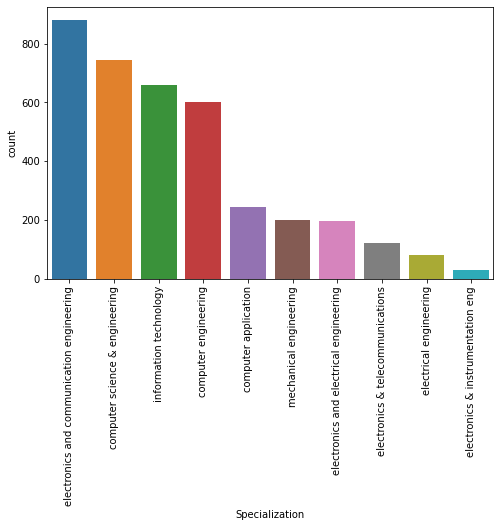

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data['Specialization'],order=data['Specialization'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

* More than 800 students has Electronic and communication engineering Specialization which is highest count.
* Second highest Specialization is computer science and engineering.
* Electronics and instrumentation has lowest count.

###### CollegeState

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


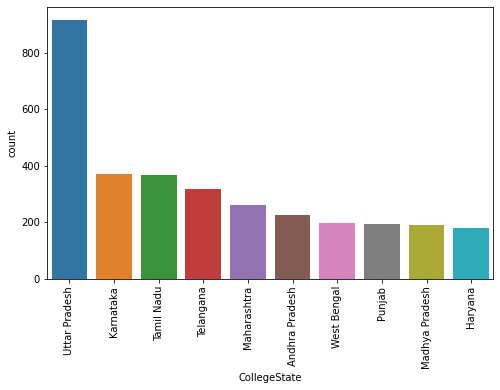

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data['CollegeState'],order=data['CollegeState'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)
plt.show()

* More than 800 students from uttar pradesh.
* Karnataka and tamil nadu has second highest count
* Haryana has lowest counts.

### Conlusion

* Company can focus on "Senior software engineer" designation and can find the reason why it has lowest count.
* Company can focus on two metro city mumbai and kolkata  which has lower count of student.It can play vital role for company.
* College tier 1 has lower count. 